<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-файла" data-toc-modified-id="Загрузка-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка файла</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Создание-обратимой-матрицы" data-toc-modified-id="Создание-обратимой-матрицы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание обратимой матрицы</a></span></li><li><span><a href="#Подготовка-данных-для-анализа" data-toc-modified-id="Подготовка-данных-для-анализа-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовка данных для анализа</a></span></li><li><span><a href="#Функция-линейной-модели" data-toc-modified-id="Функция-линейной-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Функция линейной модели</a></span></li><li><span><a href="#Сравнение-результатов" data-toc-modified-id="Сравнение-результатов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Сравнение результатов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

__Описание данных__

* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

### Загрузка библиотек

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
# еще чуть-чуть глобальных переменных:
RANDOM_STATE = 42

### Загрузка файла

In [3]:
# Загрузка данных
url_local = 'datasets/insurance.csv'
url_global = 'https://code.s3.yandex.net/datasets/insurance.csv'

if os.path.exists(url_local):
    data = pd.read_csv(url_local)
elif os.path.exists(url_global):
    data = pd.read_csv(url_global)
else:
    print('OMG! Something is wrong.')

In [4]:
# Проверим, что загрузилось
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
# Посмотрим общую информацию:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
# Проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Все данные соответствуют описананию колонок. Преобразования не требуются.

In [7]:
# Проверим наличие дубликатов в дата-сете:
data.duplicated().sum()

153

In [8]:
# ... и удалим их
data = data.drop_duplicates()

# проверим, что получилось:
data.duplicated().sum()

0

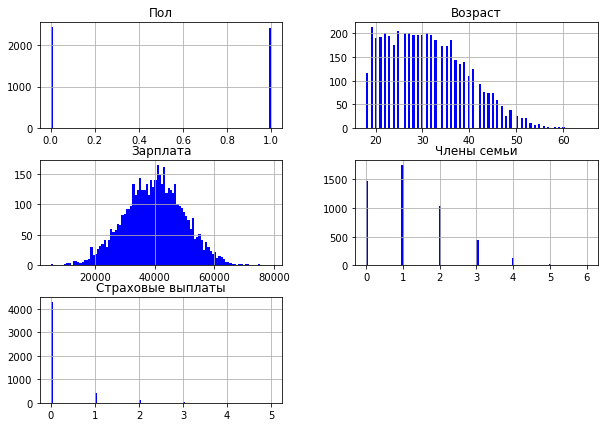

In [9]:
# Посмотрим распределение по каждому региону:
def data_distribution(data):
    data.hist(figsize=(10,7),
              bins=100,
              color = 'blue')
    plt.show()
data_distribution(data)    

__Вывод:__

* Удалены дубликаты
* Аномалии не выявлены

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Ответьте на вопрос и обоснуйте решение. 
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Не изменится.

**Обоснование:**

* Матрицу $A$ называют обратимой, если для нее существует обратная, в противном случае — необратимой.




* **Основные свойства обратной матрицы:**

$АА^{-1}=А^{-1}А=E$, где $E$ - единичная матрица.

$(АВ)^{-1}=В^{-1}А^{-1}$, т.е. при раскрытии скобок порядок сомножителей меняется на обратный.

$(А^{T})^{-1}=(А^{-1})^{T}$, т.е. операции обращения и транспонирования можно менять местами.

* **Основные свойства транспонирования матриц:**

1. Двойное транспонирование ***возвращает*** исходную матрицу: $(А^{T})^{T}=А$.

2. Транспонирование ***суммы*** матриц эквивалентно сумме транспонированных слагаемых: $(А+В)^{T}=А^{T}+В^{T}$.

3. Транспонирование ***произведения*** двух матриц эквивалентно произведению транспонированных матриц, взятых ***в обратном порядке***: $(АВ)^{T} = В^{T}А^{T}$.

4. Произведение матрицы на свою транспонированную: $А^{T}А$ или $АА^{T}$ всегда имеет результатом ***симметричную*** квадратную матрицу.




Пусть матрица $P$ будет обратимой к матрице признаков $A$. 

Тогда выражение с формулой обучения

$$
w = (X^T X)^{-1} X^T y
$$

при умнможении признаков на матрицу $P$ примет следующий вид:

$$
w(XP, y) = ([XP]^T [XP])^{-1} [XP]^T y
$$
    
воспользуемся свойством транспонированных матриц (Транспонирование произведения двух матриц эквивалентно произведению транспонированных матриц, взятых в обратном порядке):

$$
w(XP, y) = ([P^T X^T] [XP])^{-1} [P^T X^T] y
$$

преобразуем равенство в:
$$
w(XP, y) = P^{-1} (X^T X)^{-1} (P^T)^{-1}[P^T X^T] y
$$

преобразуем равенство в:
$$
w(XP, y) = P^{-1}(X^T X)^{-1} [(P^T)^{-1} P^T] X^T y
$$

преобразуем равенство c учетом того, что $(P^T)^{-1}P^T = E$:

$$
w(XP, y) = P^{-1} (X ^T X)^{-1}  E X^T y
$$

Отсюда можно сделать вывод из условия (заданой формулы поиска наименьшей ошибки), что значение:
$$
w(XP, y) =  P^{-1} w(X, y)
$$

По сути матрица признаков умножается на возможную обратимую матрицу, то и значения целевой функции тоже умножаются.

## Алгоритм преобразования

**Алгоритм**

* Создание обратимой матрицы
* Подготовка данных для анализа
* Функция линейной модели
* Сравнение результатов

**Обоснование**

Не совсем понял, какое может быть обоснование, что качество линейной регрессии не поменяется. Фактически оно было теоретически доказано в Главе 2.

## Проверка алгоритма

### Создание обратимой матрицы

In [10]:
# Создадим функцию, которая будет возращать обратимую матрицу от полученной:

def matrix_reversible(data):
    E = np.eye(data.shape[1])                                                 # Создание единичной матрицы:
    res = True                                                                # Необходмость повторения res 
    
    while res:
        P = np.random.normal(size=(data.shape[1], data.shape[1]))             #Создание случайной матрицы P
        if (np.round(P @ np.linalg.inv(P))==E).all() == True: res = False     #Отмена необходимости повторения
    return P

# Проверим, как работает
P = matrix_reversible(data)
P

array([[-1.15142322,  0.88574343,  0.97371929, -1.74520284, -0.2885349 ],
       [ 0.85088838, -0.22895112, -0.05329865,  0.06081637, -0.19497855],
       [-0.23749865,  0.25921225,  0.78093424,  1.7296362 ,  0.05240514],
       [ 1.56823312, -1.21390775, -0.91352758,  1.64878471, -0.33012743],
       [ 0.08870649, -1.30896082, -1.32297999,  1.9637746 ,  0.25928101]])

### Подготовка данных для анализа

In [11]:
# Подготовим данные для анализа (фактически возьмем уже готовые из вышеобработанной)
X = data.loc[:, ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']]
y = data.loc[:, ['Страховые выплаты']]

# разобьем их на обучающую и тестовую:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

# проверим, что получилось:
len(X_train), len(X_test), len(y_train), len(y_test)

(3877, 970, 3877, 970)

### Функция линейной модели

In [12]:
# Создадим функцию с линейной моделью, которая будет принимать на вход датасеты
def line_model(X_train, X_test, y_train, y_test):
    LM = LinearRegression()
    LM.fit(X_train, y_train)
    
    pred = LM.predict(X_test)
    return r2_score(y_test, pred)

### Сравнение результатов

In [13]:
# создадим df для исследований
model_rep = pd.DataFrame({"Модель": [],
                          "R2": []
                          })

# до преобразований
model_rep = model_rep.append({"Модель": 'Line model (до преобразований)',
                          "R2": line_model(X_train, X_test, y_train, y_test)},
                         ignore_index=True)

# после преобразований
P = matrix_reversible(X_train)
model_rep = model_rep.append({"Модель": 'Line model (после преобразований)',
                          "R2": line_model(X_train @ P, X_test @ P, y_train, y_test)},
                         ignore_index=True)

model_rep

C:\Users\izara\AppData\Local\Temp\ipykernel_19864\3850025308.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_rep = model_rep.append({"Модель": 'Line model (до преобразований)',
C:\Users\izara\AppData\Local\Temp\ipykernel_19864\3850025308.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_rep = model_rep.append({"Модель": 'Line model (после преобразований)',


,Модель,R2
0,Line model (до преобразований),0.439266
1,Line model (после преобразований),0.439266


### Выводы

Рамках работы:

* Загружены и изучены данные по количиеству страховых выплат в зависимости от признаков застрахованных лиц.
* Произведена преобработка описанных данных
* Теоретически доказано, что при умножении признаков на обратимую матрицу, качество не изменится.
* Реализован алгоритм с помощью матричных операций. Качество линейной регрессии из sklearn не отличается до и после преобразования. Использована метрику R2.


In [14]:
from random import randint

SPACE = '_'
STRAR = '*'

def toy(line):
    tmp = ''
    index = randint(0, len(line)-1)

    for i in range(len(line)):
        tmp += line[i] if i != index else 'o'

    return tmp


if __name__ == "__main__":
    rows = 20
    spaces = rows-1
    stars = 2

    for i in range(rows):
        print(
            (SPACE*spaces) +
            ((STRAR*stars) if (i % 2) != 0 else toy(STRAR*stars)) +
            (SPACE*spaces)
        )
        stars += 2
        spaces -= 1

___________________o*___________________
__________________****__________________
_________________**o***_________________
________________********________________
_______________*****o****_______________
______________************______________
_____________********o*****_____________
____________****************____________
___________****o*************___________
__________********************__________
_________*****************o****_________
________************************________
_______***************o**********_______
______****************************______
_____*************o****************_____
____********************************____
___*o********************************___
__************************************__
_************************************o*_
****************************************
